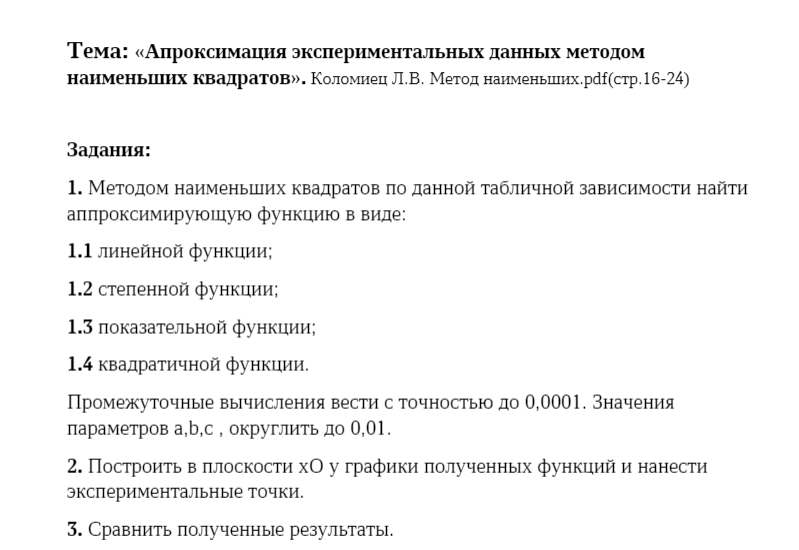

суть метода наименьших квадратов

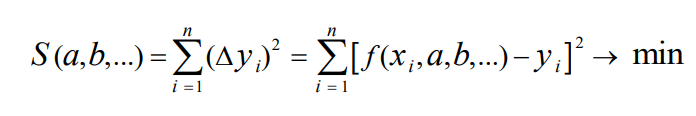

In [7]:
import numpy as np
import matplotlib.pyplot as plt


x_data = np.array([1,2,3,4,5,6])
y_data = np.array([1,1.5,3,4.5,7,8.5])

e = 2

def linear_function(x, a, b): return a * x + b

def power_function(x, a, b): return b * x**a

def exponential_function(x, a, b): return b * np.exp(a * x)

def quadratic_function(x, a, b, c): return a * x**2 + b * x + c


**Линейная**

Для линейной аппроксимации ($y = ax + b$)

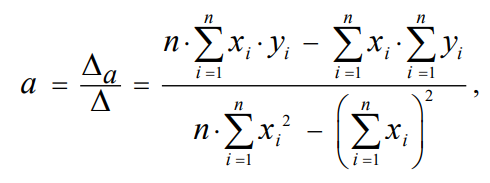
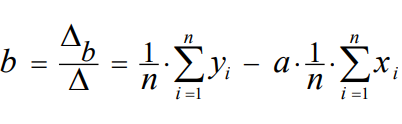

In [8]:
def linear_least_squares(x_d, y_d):
    n = len(x_d)

    # Суммы для вычисления параметров
    sum_x = sum(x_d)
    sum_y = sum(y_d)
    sum_xy = sum(x * y for x, y in zip(x_d, y_d))
    sum_x_squared = sum(x**2 for x in x_d)

    # Вычисление параметров a и b
    a = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    b = (sum_y - a * sum_x) / n

    return round(a, e), round(b, e)

**Степенная**

Для степенной аппроксимации ($ y = \beta x^a$) логарифмируем и получаем следующий вид:

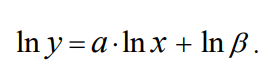

Задача сводится к линейному случаю, находим a и b, а $\beta = e^b$



In [9]:
def power_least_squares(x_d, y_d):
    a, b = linear_least_squares(np.log(x_d), np.log(y_d))
    return round(a, e), round(np.exp(b),e)

**Показательная**

Для показательной аппроксимации ($y = \beta e^{ax}$) логарифмируем и получаем вид:

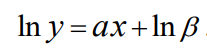

Задача свелась к линейному случаю

In [10]:
def exponential_least_squares(x_d, y_d):
    a, b = linear_least_squares(x_d, np.log(y_d))
    return round(a, e), round(np.exp(b),e)

**Квадратичная**

Для квадратичной аппроксимации ($y = ax^2 + bx + c$)



In [11]:
def quadratic_least_squares(x_d, y_d):
    n = len(x_d)

    sum_x = sum(x_d)
    sum_x2 = sum(x_d**2)
    sum_x3 = sum(x_d**3)
    sum_x4 = sum(x_d**4)
    sum_y = sum(y_d)
    sum_xy = sum(x_d*y_d)
    sum_x2y = sum((x_d**2)*y_d)

    A = [[n, sum_x, sum_x2], [sum_x, sum_x2, sum_x3], [sum_x2, sum_x3, sum_x4]]
    B = [sum_y, sum_xy, sum_x2y]

    # Решаем систему линейных уравнений
    a, b, c = np.linalg.solve(A, B)

    return round(c, e), round(b, e), round(a, e)

Линейная: 1.59 * x + -1.3
Степенная: 0.82 * x ^ 1.26
Показательная: 0.68 * e ^ (0.45 * x)
Квадратичная: 0.16 * x ^ 2 + 0.46 * x + 0.2


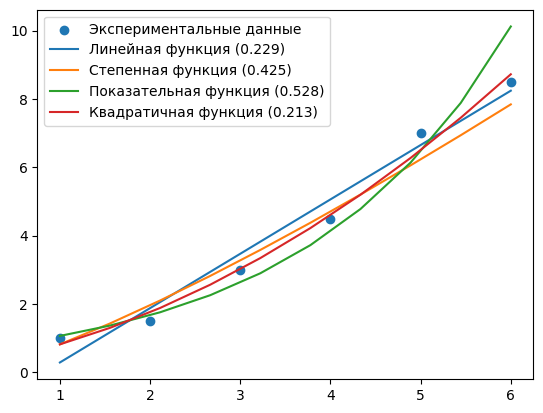

In [12]:

# Создаем массив x для построения графиков
x_fit = np.linspace(min(x_data), max(x_data), 10)

coefs = [linear_least_squares(x_data, y_data), power_least_squares(x_data, y_data),
    exponential_least_squares(x_data, y_data), quadratic_least_squares(x_data, y_data)]

print(f'Линейная: {coefs[0][0]} * x + {coefs[0][1]}')
print(f'Степенная: {coefs[1][1]} * x ^ {coefs[1][0]}')
print(f'Показательная: {coefs[2][1]} * e ^ ({coefs[2][0]} * x)')
print(f'Квадратичная: {coefs[3][0]} * x ^ 2 + {coefs[3][1]} * x + {coefs[3][2]}')


# Вычисление ошибок
n = len(x_data)
error = [0] * 4
error[0] = sum([i*i for i in (linear_function(x_data, *coefs[0]) - y_data)]) / len(x_data)
error[1] = sum(abs(power_function(x_data, *coefs[1]) - y_data)) / len(x_data)
error[2] = sum(abs(exponential_function(x_data, *coefs[2]) - y_data)) / len(x_data)
error[3] = sum(abs(quadratic_function(x_data, *coefs[3]) - y_data)) / len(x_data)

# Построение графиков
plt.scatter(x_data, y_data, label='Экспериментальные данные')

plt.plot(x_fit, linear_function(x_fit, *coefs[0]), label=f'Линейная функция ({error[0]:.3})')
plt.plot(x_fit, power_function(x_fit, *coefs[1]), label=f'Степенная функция ({error[1]:.3})')
plt.plot(x_fit, exponential_function(x_fit, *coefs[2]), label=f'Показательная функция ({error[2]:.3})')
plt.plot(x_fit, quadratic_function(x_fit, *coefs[3]), label=f'Квадратичная функция ({error[3]:.3})')

plt.legend()
plt.show()
